In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer Churn.csv to Telco Customer Churn.csv


In [ ]:
Initial EDA

In [ ]:
df=pd.read_csv('Telco Customer Churn.csv' ,encoding ='latin')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
['Female' 'Male']
Column: SeniorCitizen
[0 1]
Column: Partner
['Yes' 'No']
Column: Dependents
['No' 'Yes']
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
['No' 'Yes']
Column: MultipleLines
['No phone service' 'No' 'Yes']
Column: InternetService
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Column: OnlineBackup
['Yes' 'No' 'No internet service']
Column: DeviceProtection
['No' 'Yes' 'No internet service']
Column: TechSupport
['No' 'Yes' 'No internet service']
Column: StreamingTV
['No' 'Yes' 'No internet service']
Column: StreamingMovies
['No' 'Yes' 'No internet service']
Column: Contract
['Month-to-month' 'One year' 'Two ye

In [ ]:
df['TotalCharges']= df['TotalCharges'].apply(lambda x:0 if x==' ' else x)
df['TotalCharges']= df['TotalCharges'].astype(float)

In [ ]:
df['Churn']= df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn']= df['Churn'].astype('int64')

In [ ]:
df['gender']= df['gender'].apply(lambda x:1 if x=='Female' else 0)
df['gender']= df['gender'].astype('int64')

In [ ]:
df['Partner']= df['Partner'].apply(lambda x:1 if x=='Yes' else 0)
df['Partner']= df['Partner'].astype('int64')

In [ ]:
df['Dependents']= df['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
df['Dependents']= df['Dependents'].astype('int64')

In [ ]:
df['PhoneService']= df['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
df['PhoneService']= df['PhoneService'].astype('int64')

In [ ]:
df['PaperlessBilling']= df['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)
df['PaperlessBilling']= df['PaperlessBilling'].astype('int64')

In [ ]:
df['MultipleLines']= df['MultipleLines'].apply(lambda x:1 if x=='Yes' else (2 if x=='No phone service' else 0))
df['MultipleLines']= df['MultipleLines'].astype('int64')

In [ ]:
df['InternetService']= df['InternetService'].apply(lambda x:1 if x=='DSL' else (2 if x=='Fiber optic' else 0))
df['InternetService']= df['InternetService'].astype('int64')

In [ ]:
df['OnlineSecurity']= df['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['OnlineSecurity']= df['OnlineSecurity'].astype('int64')

In [ ]:
df['OnlineBackup']= df['OnlineBackup'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['OnlineBackup']= df['OnlineBackup'].astype('int64')

In [ ]:
df['DeviceProtection']= df['DeviceProtection'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['DeviceProtection']= df['DeviceProtection'].astype('int64')

In [ ]:
df['TechSupport']= df['TechSupport'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['TechSupport']= df['TechSupport'].astype('int64')

In [ ]:
df['StreamingTV']= df['StreamingTV'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['StreamingTV']= df['StreamingTV'].astype('int64')

In [ ]:
df['StreamingMovies']= df['StreamingMovies'].apply(lambda x:1 if x=='Yes' else (2 if x=='No internet service' else 0))
df['StreamingMovies']= df['StreamingMovies'].astype('int64')

In [ ]:
df['Contract']= df['Contract'].apply(lambda x:1 if x=='One year' else (2 if x=='Two year' else 0))
df['Contract']= df['Contract'].astype('int64')

In [ ]:
df['PaymentMethod']= df['PaymentMethod'].apply(lambda x:1 if x=='Mailed check' else (2 if x=='Bank transfer (automatic)' else (3 if x=='Credit card (automatic)' else 0)))
df['PaymentMethod']= df['PaymentMethod'].astype('int64')

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,1.222916,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.315633,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.778877,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Dropping Column

In [ ]:
df = df.drop(columns = ['customerID'])

Target Feauture Analysis

In [ ]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

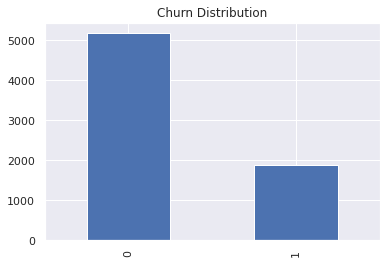

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.show()

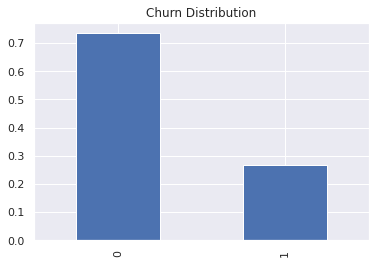

In [ ]:
df['Churn'].value_counts(True).plot(kind='bar')
plt.title('Churn Distribution')
plt.show()

Correlation Analysis

In [ ]:
df_corr = df.corr()
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.000485,0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,-0.000126,0.011754,0.005209,0.014569,0.000080,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.030659,0.146153,0.250628,0.019423
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.154380,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.086220,-0.291449


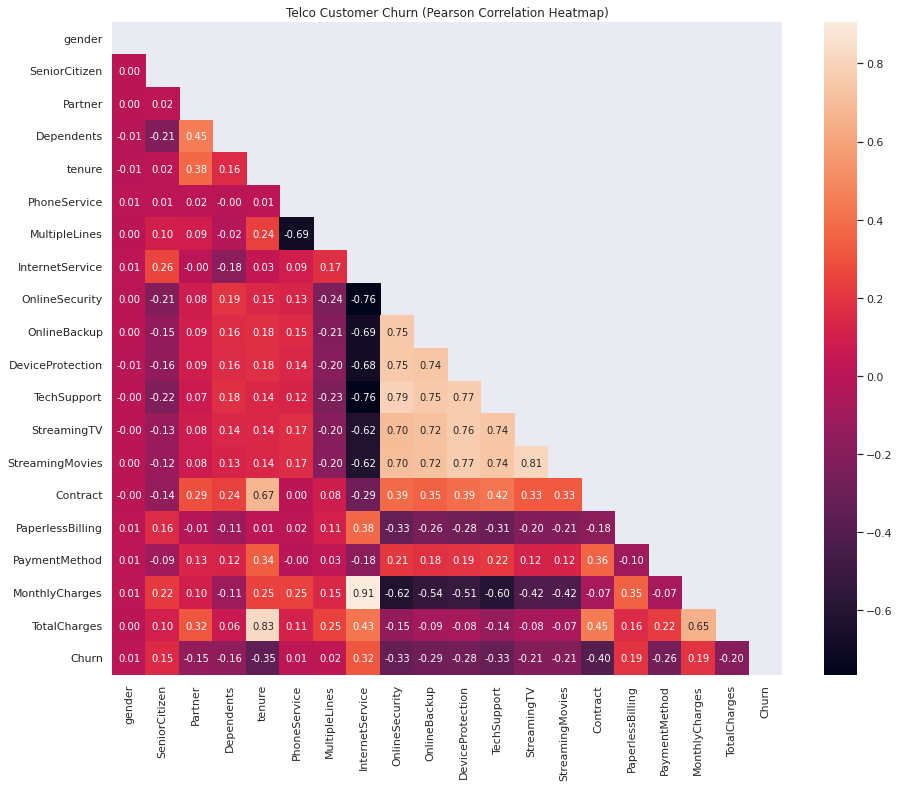

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Telco Customer Churn (Pearson Correlation Heatmap)")
plt.show()

TotalCharges Outlier Analysis

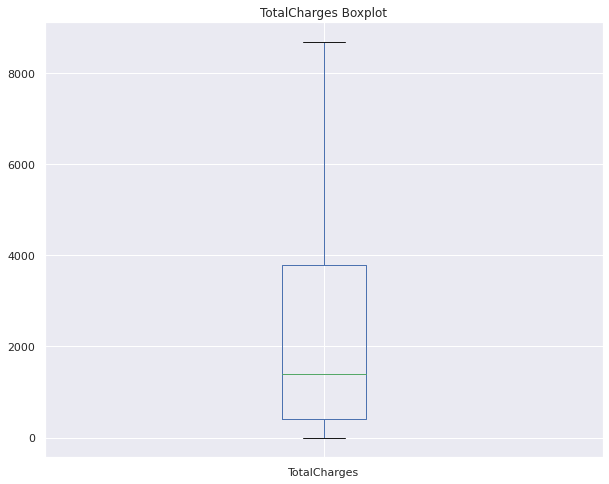

In [ ]:
df['TotalCharges'].plot(kind='box',figsize=(10,8))
plt.title("TotalCharges Boxplot")
plt.show()

Services Analysis

In [ ]:
df.groupby(['InternetService'])[['Churn']].agg({'count','mean'})

Churn      
                     mean count
InternetService                
0                0.074050  1526
1                0.189591  2421
2                0.418928  3096

In [ ]:
df_services_analysis = df.copy()
df_services_analysis['services'] = df_services_analysis.apply(lambda x: 'OS' if x['OnlineSecurity']==1 else
                                                    'OB' if x['OnlineBackup']==1 else
                                                    'DP' if x['DeviceProtection']==1 else
                                                    'TS' if x['TechSupport']==1 else
                                                    'ST' if x['StreamingTV']==1 else
                                                    'SM'
                                        ,axis=1)

In [ ]:
df_services_analysis.groupby(['services'])[['Churn']].agg({'count','mean'})

Churn      
              mean count
services                
DP        0.384840   686
OB        0.310054  1303
OS        0.146112  2019
SM        0.247504  2404
ST        0.606684   389
TS        0.309917   242

Demographic Analysis

In [ ]:
df.groupby(['SeniorCitizen','Partner'])[['Churn']].agg({'count','mean'})

Churn      
                           mean count
SeniorCitizen Partner                
0             0        0.300130  3072
              1        0.166490  2829
1             0        0.488576   569
              1        0.345550   573

In [ ]:
df.groupby(['SeniorCitizen','Dependents'])[['Churn']].agg({'count','mean'})

Churn      
                              mean count
SeniorCitizen Dependents                
0             0           0.280526  3882
              1           0.150570  2019
1             0           0.431970  1051
              1           0.241758    91

Customer Account Analysis

In [ ]:
df_services_analysis.groupby(['Contract'])[['Churn']].agg({'count','mean'})

Churn      
              mean count
Contract                
0         0.427097  3875
1         0.112695  1473
2         0.028319  1695

In [ ]:
df_services_analysis.groupby(['PaperlessBilling','PaymentMethod'])[['Churn']].agg({'count','mean'})

Churn      
                                    mean count
PaperlessBilling PaymentMethod                
0                0              0.327448   623
                 1              0.134937   956
                 2              0.110260   653
                 3              0.100000   640
1                0              0.497704  1742
                 1              0.272866   656
                 2              0.208754   891
                 3              0.190476   882